In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [54]:
import matplotlib.image as mpimg
from scipy.ndimage import convolve

G = 1 / 273 * np.matrix([[1, 4 , 7 , 4 , 1],
                         [4, 16, 26, 16, 4],
                         [7, 26, 41, 26, 7],
                         [4, 16, 26, 16, 4],
                         [1, 4 , 7 , 4 , 1]]) 

Gx = np.matrix([[-1, 0, 1], 
                [-2, 0, 2], 
                [-1, 0, 1]])

Gy = np.flip(Gx.T)

def load_image(path): 
    return mpimg.imread(path)

def plot_image(img): 
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    
def rgb2gray(rgb): 
    return np.dot(rgb[...,:3], [0.2989, 0.587, 0.114])

def det2(a, b, c, d): 
    return a * d - b * c

def is_right_turn(p1, p2, p3): 
    return det2(p1[0] - p2[0], p1[1] - p2[1], p3[0] - p2[0], p3[1] - p2[1]) >= 0

def convex_hull(P):
    n = len(P)
    sorted(P, key=lambda p: p[0])
    L_upper = [P[0], P[1]]
    for i in range(2, n):
        L_upper.append(P[i])
        while len(L_upper) > 2 and not is_right_turn(*L_upper[-3:]):
            del L_upper[-2]
    L_lower = [P[-1], P[-2]]
    for i in range(n - 2, 0, -1):
        L_lower.append(P[i])
        while len(L_lower) > 2 and not is_right_turn(*L_lower[-3:]):
            del L_lower[-2]
    return L_upper + L_lower

def find_convex_polygon(S, t1=0.3, t2=2.0):
    S = rgb2gray(S) / 255
    S = convolve(S, G)
    Sdx = convolve(S, Gx)
    Sdy = convolve(S, Gy)
    S = abs(Sdx + Sdy)
    S /= np.max(S)
    S = np.vectorize(lambda x: 1 if t1 < x < t2 else 0)(S)
    P = [(y, x) 
         for y in range(S.shape[1]) 
         for x in range(S.shape[0]) 
         if S[x, y] > 0.5]
    P = sorted(P, key=lambda x: x[0])
    return convex_hull(P)

In [55]:
IMG_SIZE = (12, 12)

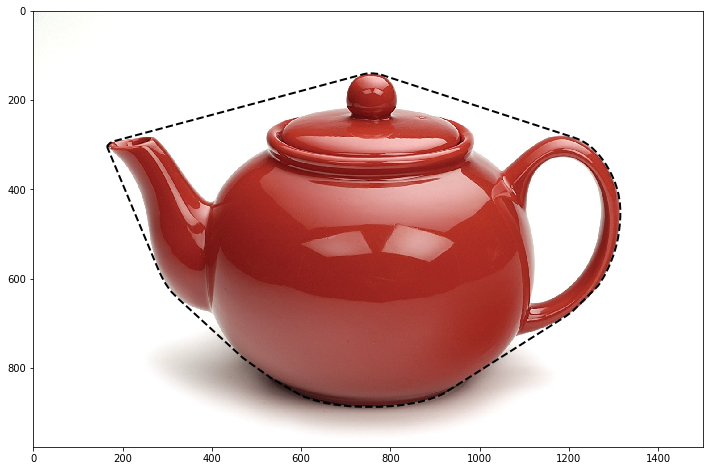

In [57]:
img = load_image('teapot.jpeg')
ch = find_convex_polygon(img, 0.12, 0.99)
figure(figsize=(IMG_SIZE))
plot(*zip(*ch), c='black', lw=2, ls='dashed')
#plot(*zip(*ch), 'o', c='black', ms=10, alpha=0.25)
imshow(img)

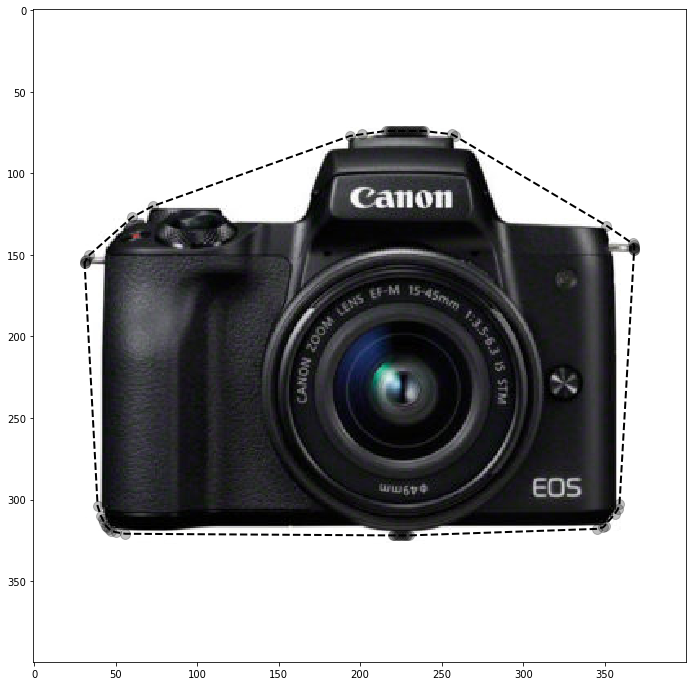

In [47]:
img = load_image('camera.jpg')
ch = find_convex_polygon(img, 0.12, 0.99)
figure(figsize=IMG_SIZE)
plot(*zip(*ch), c='black', lw=2, ls='dashed')
plot(*zip(*ch), 'o', c='black', ms=10, alpha=0.25)
imshow(img)

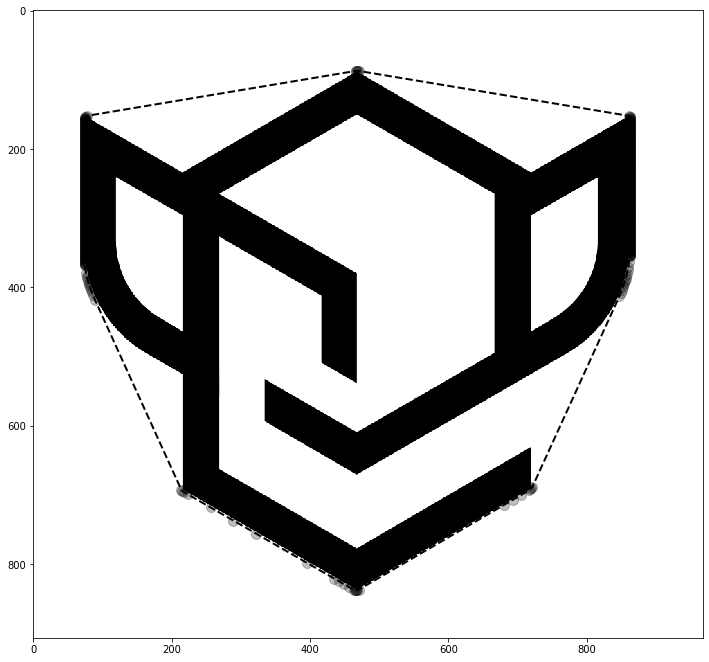

In [48]:
img = load_image('elfsquad.png')
ch = find_convex_polygon(img, 0.12, 0.99)
figure(figsize=IMG_SIZE)
plot(*zip(*ch), c='black', lw=2, ls='dashed')
plot(*zip(*ch), 'o', c='black', ms=10, alpha=0.25)
imshow(img)

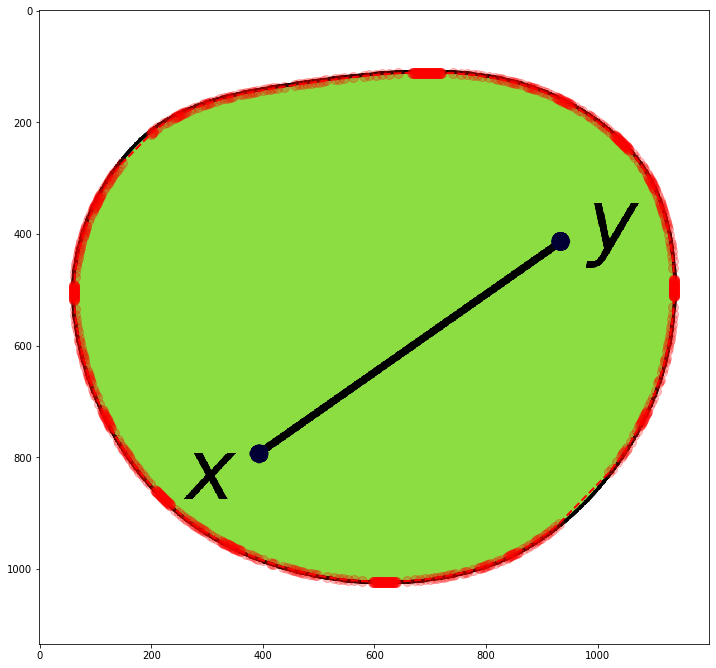

In [50]:
img = load_image('convex.png')
ch = find_convex_polygon(img, 0.12, 0.99)
figure(figsize=IMG_SIZE)
plot(*zip(*ch), c='red', lw=2, ls='dashed')
plot(*zip(*ch), 'o', c='red', ms=10, alpha=0.25)
imshow(img)